In [32]:
import pandas as pd
%matplotlib inline
final_output = pd.read_csv('final_output.csv')
final_output['date'] = final_output['date'].astype('datetime64')

In [35]:
final_output['Year'] = final_output['date'].dt.year
final_output['Month'] = final_output['date'].dt.month
final_output['Day'] = final_output['date'].dt.day


In [36]:
By_month_day_year = final_output.groupby(['Month','Year','Day']).size().reset_index()


In [37]:
for i in range(len(final_output)):
    if (final_output['sentiment'].iloc[i] == 0) :
        final_output['sentiment'].iloc[i] = -1

In [38]:
final_By_month_day_year

In [39]:
final_By_month_day_year = final_output.groupby(['Year','Month','Day'])['sentiment'].sum()

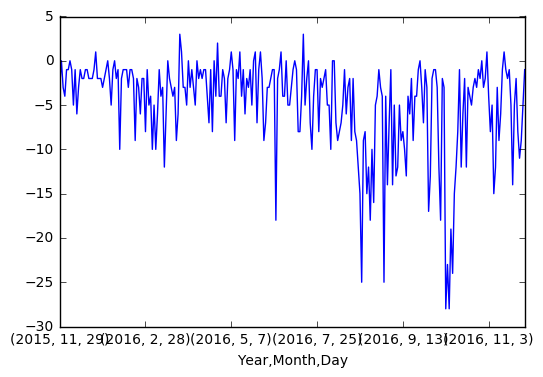

In [41]:
final_By_month_day_year.plot()

In [50]:
stock = pd.read_csv('samsung.csv')
stock['Change'] = stock['Open'] - stock['Close']

In [52]:
stock['Date'] = stock['Date'].astype('datetime64')

In [54]:
stock['Year'] = stock['Date'].dt.year
stock['Month'] = stock['Date'].dt.month
stock['Day'] = stock['Date'].dt.day


In [57]:
joined_dataset = pd.merge(stock,final_By_month_day_year.reset_index(),on=['Year','Month','Day'],how='inner')

In [70]:
joined_dataset['Change'] = joined_dataset['Change']/joined_dataset['Change'].sum() 
joined_dataset['sentiment'] = joined_dataset['sentiment']/joined_dataset['sentiment'].sum() * -1


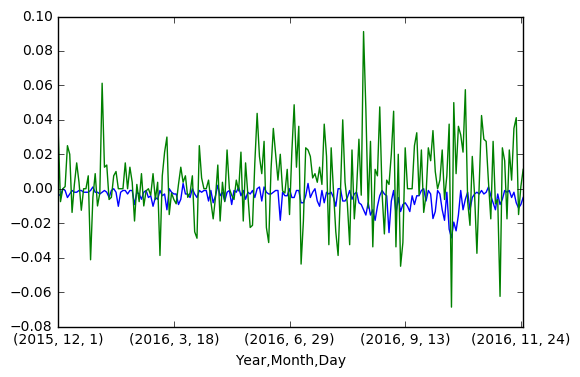

In [74]:
joined_dataset.groupby(['Year','Month','Day'])['sentiment'].sum().plot()
joined_dataset.groupby(['Year','Month','Day'])['Change'].sum().plot()

In [75]:
import numpy as np

In [78]:
corr_array = np.asarray(joined_dataset[['sentiment','Change']])
